<a href="https://colab.research.google.com/github/1kaiser/hydrological-model/blob/master/%F0%9F%8C%8Ahydrological_model_Jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POINTS Section

POINTS

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 05 00:46:36 2012

@author: nrjh
"""

import jax.numpy as jnp

class Point2D(object):
    '''A class to represent 2-D points'''

    def __init__(self,x,y):
        """Constructor for Point2D
        
        Input Parameter:
            x – x-coordinate, an integer or float
            y – y–coordinate, an integer or float
        
        """

        self._x=x*1. #ensure points are always floats
        self._y=y*1.
        
       
    def clone(self):
        """returns a clone of self (another identical Point2D object) 
        """
        return Point2D(self._x,self._y)

 
    def get_x(self):
        """returns x coordinate"""
        return self._x
        
         
    def get_y(self):
        """returns y coordinate"""
        return self._y
        
    def get_coord(self,arg):
        """return x coord if arg=0, else y coord"""
        if arg==0:
            return self._x
        else:
            return self._y
        
      
    def get_xys(self):
        """returns x,y tupel"""
        return (self.x,self._y)        
    
    
    def move(self,x_move,y_move):
        """moves points by specified x-y vector"""
        self._x = self._x + x_move
        self._y = self._y + y_move
        
  
    def distance(self, other_point):
        """calculates and return distance"""
        xd=self._x-other_point._x
        yd=self._y-other_point._y
        return jnp.sqrt((xd*xd)+(yd*yd))
       
     
    def samePoint(self,point):
        if point==self:
             return True

    def sameCoords(self,point,absolute=True,tol=1e-12):
        if absolute:
            return (point.get_x()==self._x and point.get_y()==self._y)
        else:
            xequiv=jnp.abs((self.get_x()/point.get_x())-1.)<tol
            yequiv=jnp.abs((self.get_y()/point.get_y())-1.)<tol
            return xequiv and yequiv
            
    
#End of class Point 2D
#********************************************************


class PointField(object):
    '''A class to represent a field (collection) of points'''
    
    def __init__(self,PointsList=None):
        self._allPoints = []
        if isinstance(PointsList, list):
            self._allPoints = []
            for point in PointsList:
                if isinstance(point, Point2D):
                    self._allPoints.append(point.clone())
  
    def getPoints(self):
        return self._allPoints
        
    def size(self):
        return len(self._allPoints)
    
    def move(self,x_move,y_move):
        for p in self._allPoints:
            p.move(x_move,y_move)
    
    def append(self,p):
        self._allPoints.append(p.clone())

#method nearestPoint
    def nearestPoint(self,p,exclude=False):
        """A simple method to find the nearest Point to the passed Point2D
        object, p.  Exclude is a boolean we can use at some point to
        deal with what happens if p is in the point set of this object, i.e
        we can choose to ignore calculation of the nearest point if it is in 
        the same set"""
 
#check we're been passed a point   
        if isinstance(p,Point2D):
 
#set first point to be the initial nearest distance           
            nearest_p=self._allPoints[0]           
            nearest_d=p.distance(nearest_p)

# now itereate through all the other points in the PointField
# testing for each point, i.e start at index 1
            for testp in self._allPoints[1:]:

# calculate the distance to each point (as a test point)
                d=p.distance(testp)

# if the test point is closer than the existing closest, update
# the closest point and closest distance
                if d<nearest_d:
                    nearest_p=testp
                    nearest_d=d

# return the nearest point                    
            return nearest_p

#else not a Point passed, return nothing       
        else:
            return None
            
        

    def sortPoints(self):
           """ A method to sort points in x using raw position sort """
           self._allPoints.sort(pointSorterOnX)
        
        
   
class Point3D (Point2D):

    def __init__(self, x, y, z):
        print ('I am a Point3D object')
        Point2D.__init__(self, x, y)
        self._z = z
        print ('My z coordinate is ' + str(self._z))
        print ('My x coordinate is ' + str(self._x))
        print ('My x coordinate is ' + str(self._y))

    def clone(self):
        return Point3D(self._x, self._y, self._z)
        
    def get_z(self):
        return self._z
    
    def move(self, x_move, y_move, z_move):
        Point2D.move(self,x_move, y_move)
        self._z = self._z + z_move
    
    def distance(self, other_point):
        zd=self._z-other_point.get_z()
#        xd=self._x-other_point.get_x()
#        yd=self._y-other_point.get_y()
        d2=Point2D.distance(self,other_point)
        d3=jnp.sqrt((d2*d2)+(zd*zd))
        return d3
        

    
def pointSorterOnX(p1,p2):
    x1=p1.get_x()
    x2=p2.get_x()
    if (x1<x2): return -1
    elif (x1==x2): return 0
    else: return 1

def pointSorterOnY(p1,p2):
    y1=p1.get_y()
    y2=p2.get_y()
    if (y1<y2): return -1
    elif (y1==y2): return 0
    else: return 1

        

# raster Section

raster

In [2]:
# -*- coding: utf-8 -*-
"""

"""
import jax.numpy as jnp

class Raster(object):
    
    '''A class to represent 2-D Rasters'''

    def __init__(self,data,xorg,yorg,cellsize,nodata=-999.999):
        """Constructor of a Raster, sets all the object variables
        
        Origin: xorg=0 and yorg=0 is left down corner of a cell
        
        Input Parameter:
            data
            xorg – An Integer describing x-origin
            yorg – An Integer describing y-origin
            cellsize – A Number describing cellsize (e.g. 1)
            nodata – No data representation
            
        """
        self._data=jnp.array(data)
        self._orgs=(xorg,yorg)
        self._cellsize=cellsize
        self._nodata=nodata
        
    def getData(self):
        return self._data
    
           
    def getShape(self):
        """return the shape of the data array"""
        return self._data.shape    
    
    def getRows(self):
        return self._data.shape[0]
        
    def getCols(self):
        return self._data.shape[1]
        
    def getOrgs(self):
        """Returns raster origin
        
        Returns:
            self._orgs – a tuple of (xorg, yorg)
        """
        return self._orgs
        
    def getCellsize(self):
        return self._cellsize
    
    def getNoData(self):
        return self._nodata
    

    def createWithIncreasedCellsize(self, factor):
        """returns a new Raster with cell size larger by a factor (which must be an integer)
        
        Input Parameter:
            factor – factor of increased cellsize
        Returns:
            resampled Raster, a Raster object
        """
        if factor== 1: #doesnt do anything
            return self
        else:
            return self.resample(factor)


    def resample(self, factor):
        """Resamples the raster
        
        Input Parameter:
            factor – factor of cellsize
        
        Returns:
            resampled Raster, a Raster object
        """
        nrows=self.getRows() // factor #floor division, calcucate new number of rows
        ncols=self.getCols() // factor #floor division, calcucate new number of cols
        newdata=jnp.zeros([nrows, ncols]) #create empty array
        
        for i in range(nrows): #iterate
            for j in range(ncols): #iterate
                sumCellValue=0.0 #set sum to zero at the start
                for k in range(factor): #smaller box iterates through values in a (new) cell
                    for l in range(factor):
                        #"i*factor + k" calculates y position of data in original raster
                        sumCellValue += self._data[i*factor + k, j*factor +l] #add new value to sum
                newdata[i,j]=sumCellValue / factor / factor + 100 #dividing by number of cells
        return Raster(newdata, self.getOrgs()[0],self.getOrgs()[1], self._cellsize*factor) #return new raster
    
    


    def __repr__(self):
        """String representation
        """
        return str(self.getData())

# flow Section

flow


In [3]:
import jax.numpy as jnp



class FlowNode(Point2D):
    """Class representing nodes (points) in a Flow Raster
    
    Inherits from Point2D class
    
    """
    
    def __init__(self,x,y, value, rainfall=None):
        """Constructor for FlowNode
        
        Input Parameter:
            x – x-position of node within grid
            y – y-position of node within grid
            value – value at the node position (e.g. elevation)
        
        """
        Point2D.__init__(self,x,y) #use constructor of super class
        self._downnode=None #is set with setDownnode()
        self._upnodes=[]
        self._pitflag=True #set to true as FlowNode doesn't have a downnode at the moment
        self._value=value
        self._rainfall=rainfall
        self._lakedepth=0
        
    def setDownnode(self, newDownNode):
        """Sets the downnode of a FlowNode object, sets itself as an upnode 
        Can also be used to change a previous downnode to a new downnode as it removes itself as an upnode
        
        Input Parameter:
            newDownNode – a FlowNode object representing the downnode
            
        """
        self._pitflag=(newDownNode==None) #sets pitflag to True if downnode exists, else to false
        
        if (self._downnode!=None): # change previous
            self._downnode._removeUpnode(self) #remove itself as upnode (from thre downnode)
            
        if (newDownNode!=None): # insert itself as new upnode
            newDownNode._addUpnode(self)
            
        self._downnode=newDownNode # set downnode
        
        
    def getDownnode(self):
        """
        Returns:
           self._downnode – a FlowNode class object 
        """
        return self._downnode 
    
    
    def setRainfall(self, rainfall):
        """Setter for self._rainfall, sets the rainfall at the node
        
        Input Parameter:
            rainfall – rain at FlowNode object in mm
        """
        self._rainfall = rainfall
        
        
    def getRainfall(self):
        """Getter for self._rainfall
        
        Returns:
            self._rainfall – rain at FlowNode object in mm
        """
        return self._rainfall
    
        
    def getUpnodes(self):
        """Getter for self._upnodes
        Returns:
           self._upnodes – a list of FlowNode class objects
        """
        return self._upnodes
    
    
    def _removeUpnode(self, nodeToRemove):
        """Removes an upnode
        
        Input Parameter:
            nodeToRemove – a FlowNode object
        """
        self._upnodes.remove(nodeToRemove)
    
    
    def _addUpnode(self, nodeToAdd):
        """Adds an upnode
        
        Input Parameter:
            nodeToAdd – a FlowNode object
        """
        self._upnodes.append(nodeToAdd)


    def numUpnodes(self):
        """
        Returns:
           number of Upnodes
        """
        return len(self._upnodes)
    
    
    def getPitFlag(self):
        """Getter for self._pitflag
        Returns:
           self._pitflag – True or False: 
                           True when it is a pitFlag(=no downnodes)
                           False when it is not (=has downnodes)
        """
        return self._pitflag
    
    
    def setLakeDepth(self, depth):
        """Sets the depth of a lake
        
        Input Parameter:
            depth – lake depth in meter, should be 0 when it is not a lake
        """
        self._lakedepth += depth
    
    
    def getLakeDepth(self):
        """Getter for depth of lake
        Returns:
            self._lakedepth – number, zero when node is not a pitfall
        """
        return self._lakedepth
    
    
    
    def getFlow(self, constRain=None):
        """recursively adds the flow of all upnodes and its upnodes etc.
        If constant rain input parameter is null, flow is calculated from 
        recorded rainfall per node using self._rainfall
        If both, constant and self._rainfall are None, it calculates with 0mm rain
        
        Input Parameter:
            constRain – constant rain per node in mm, if left out the rainfall per node value is used
        """
        flow=0 #set to zero
        if constRain is not None:
            flow=constRain #initial flow is set to constant rain
        elif self.getRainfall() is not None: #if no constant rain is given it checks if a rainfall at this node is recorded
            flow=self.getRainfall() #initial flow is set to rainfall on cell
        
        for upnode in self.getUpnodes(): #iterare through upnotes
            flow+=upnode.getFlow(constRain) #add up flow by calling the function recursively with next upnode
        
        return flow #return result
        
    
    def getElevation(self):
        """Getter for Elevation
        
        Returns:
            self._value – a number representing elevation in m at the FlowNode
        """
        return self._value
    
    
    def fill(self, elevation):
        """Fills the node with water up to a new elevation. Calculates the depth.
        
        Input Parameter:
            elevation – new elevation
        
        """
        assert elevation >= self.getElevation()
        self.setLakeDepth(elevation - self.getElevation()) #set new lake depth
        self._value = elevation
    
  
    def __str__(self):
        """String representation of FlowNode object
        
        """
        downnode= -999
        if self.getDownnode() is not None:
            downnode =self.getDownnode().getElevation()
        return "Flownode y={}, x={}, elevation={} downnode={}".format(self.get_y(), self.get_x(), self.getElevation(), downnode)
    
    
    def __repr__(self):
        """Representation of FlowNode object
        
        """
        return self.__str__()
    







class FlowRaster(Raster):
    """A class containing a Raster with FlowNodes
    
    Inherits from Raster
    """

    def __init__(self,araster):
        """Constructor for FlowRaster
        
        Input Parameter:
            araster – a Raster class object
        
        """
        #create a new raster out of araster without data
        super().__init__(None,araster.getOrgs()[0],araster.getOrgs()[1],araster.getCellsize())#call init of raster class
        data = araster.getData() #get elevation of input raster
        nodes=[]
        #insert data
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                y=(i)*self.getCellsize()+self.getOrgs()[0] #x-position of node within grid
                x=(j)*self.getCellsize()+self.getOrgs()[1] #y-position of node within grid
                nodes.append(FlowNode(x,y, data[i,j]))#add node
            
        nodearray=jnp.array(nodes) #convert list to array
        nodearray.shape=data.shape #reshape 1d array to shape of the raster
        self._data = nodearray

        self.__neighbourIterator=jnp.array([1,-1,1,0,1,1,0,-1,0,1,-1,-1,-1,0,-1,1] ) #neighbours
        self.__neighbourIterator.shape=(8,2)        
        self.setDownnodes() #calculate downnodes
        self._lakes=[]
      
        
    def getPitflags(self):
        """Returns a list of pitflag nodes
        Pitflags are nodes without a downnode
        
        Returns:
            pitflags – a list of pitflag nodes
        """
        pitflags=[]
        for i in range(self._data.shape[0]):
            for j in range(self._data.shape[1]):
                if self._data[i,j].getPitFlag():
                    pitflags.append(self._data[i,j])
        return pitflags
    

    def calculateLakes(self):
        """Calculates lakes and creates Lake class objects
        
        Calculates lakes from pitflags, calculates depth for each lake node, 
        Readjusts elevation of lake nodes to lake surface (i.e. fills lakes) 
        and resets downnodes between the lake nodes using a gravity algorithm 
        towards the lake outflow
        
        The lakes are stored in self._lakes, a list with Lake objects
        
        """        
        for pitflag in self.getPitflags(): #iterate through pitflags
            i,j = int(pitflag.get_y()/self.getCellsize()), int(pitflag.get_x()/self.getCellsize())
            edgecase = i==0 or j==0 or i==(self._data.shape[0]-1) or j==(self._data.shape[1]-1)
            #check again if pitflag because it might have changed when two lakes grow together
            if pitflag.getPitFlag() and not(edgecase):
                self._lakes.append(self.createLake(i,j)) #create a lake object
        
        for lake in self._lakes:
            self.setLakeDownnodes(lake) #set new downnodes
            assert not(lake._outflow.getPitFlag())
            assert not(lake._nodes[-2].getPitFlag())
            
                        
            
    
    
    def createLake(self, i,j):
        """Creates a lake at position i,j
        Calculates its size and nodes, calculates depths for each lake node and
        readjusts elevation of lake nodes to lake surface
        
        Input Parameter:
            i – x position (int)
            j – y position (int)
            
        Returns:
            lake – a Lake class object
        """
        assert self._data[i,j].getPitFlag() ##assert that it's a pitflag
        lake=Lake(self._data[i,j]) #create new Lake object
        lake.addNeighbours(self.getNeighbours(i,j)) #add initial lake neighbours
        
        while(lake._outflow is None): #while lake has no outflow
            lowest=lake.lowestNeighbour()
            r,c=int(lowest.get_y()/self.getCellsize()), int(lowest.get_x()/self.getCellsize()) #row and col
            lake.addNode(lowest) #adds a new node to the lake, this also removes the node from neighbours
            lake.addNeighbours(self.getNeighbours(r,c)) #add new neighbours
            
            edgecase = r==0 or c==0 or r==(self._data.shape[0]-1) or c==(self._data.shape[1]-1)
            
            if lowest.getPitFlag() and edgecase: #yeah we arrived at an edge pitfall, no more searching is needed 
                lake.finalise() # finalise the lake
        return lake
    
    
    
    
    def setLakeDownnodes(self, lake):
        """Recalculates the downnodes for each lake node using a gravitation algorithm 
        towards the outflow. Recalculates the outflow downnode.
        
        Input Parameter:
            lake – a Lake object
        """
        checked=[] #stores checked nodes
        checknode=lake._outflow #stores the current node to be checked
        tocheck=[lake._outflow] #stores the future nodes to be checked

        while (len(tocheck)+len(checked))<(len(lake._nodes)): #while not every downnode is reset

            r,c=int(checknode.get_y()/self.getCellsize()), int(checknode.get_x()/self.getCellsize())
            neighbours = self.getNeighbours(r,c) #get new neighbours of checknode

            for n in neighbours:
                if lake.isLake(n) and n not in tocheck and n not in checked: #if downnode is not set yet
                    n.setDownnode(checknode) #set a downnode from neighbour to checknode
                    tocheck.append(n) #append the new neigbours
            
            tocheck.remove(checknode) #remove the checknode
            checked.append(checknode) #append the checked to checked

            nearest=self.getNearest(lake._outflow, tocheck) #nearest from outflow
            checknode=nearest
        
        #set lake downnode of outflow
        x=int(lake._outflow.get_x()/self.getCellsize())
        y=int(lake._outflow.get_y()/self.getCellsize())
        lake._outflow.setDownnode(self.lowestNeighbour(y,x)) #set outflows downnodes
     
    
    
    
    def getNearest(self, node, nodelist):
        """Returns nearest point from nodelist to node
        
        Input Parameter:
            node – origin node, a Flow node object
            nodelist – list with FlowNode object
        
        Returns:
            pNearest – the nearest point to a node, a FlowNode object
        """
        dNearest=None
        pNearest=None
        for n in nodelist:
            d = node.distance(n)
            if dNearest is None or d<dNearest:
                dNearest=d
                pNearest=n
        return pNearest
        
        


              
    def getNeighbours(self, r, c):
        """ Returns the eight neighbours of a cell
        
        Input Parameter:
            r – x-coordinate of the cell
            c – y-coordinate of the cell
        
        Returns:
            neighbours – a list of 8 neighbour FlowNode objects
        
        """  
        neighbours=[]
        for i in range(8):
            rr=r+self.__neighbourIterator[i,0]
            cc=c+self.__neighbourIterator[i,1]
            if (rr>-1 and rr<self.getRows() and cc>-1 and cc<self.getCols()):
                neighbours.append(self._data[rr,cc])
                
        return neighbours
    
    
    def lowestNeighbour(self,r,c):
        """Calculates the lowest neighbour, excluding itself
        
        Input Parameter:
            r – x-coordinate of the cell
            c – y-coordinate of the cell
        
        Returns:
            lownode - the node representing the lowest neighbour, a FlowNode object
        """
        lownode=None
        
        for neighbour in self.getNeighbours(r,c):
            if lownode==None or neighbour.getElevation() < lownode.getElevation():
                lownode=neighbour
        
        return lownode

    def setDownnodes(self):
        """Calculates Downnodes and sets them for each FlowNode object
        
        """
        for r in range(self.getRows()):
            for c in range(self.getCols()):
                lowestN = self.lowestNeighbour(r,c)
                if (lowestN.getElevation() < self._data[r,c].getElevation()):
                    self._data[r,c].setDownnode(lowestN) #set downnode, upnode is set within the FlowNode class

    
    def getMaximumFlow(self):
        """Calculates the maximum flow within the FlowRaster
        
        Returns:
            a tuple – (maxrate, maxnode)
                    maxrate: maximum flow rate, a float
                    maxnode: node with maximum flow rate, a Flownode object
        """
        flow=self.extractValues(FlowExtractor()) #get flow data
        maxrate=None
        maxnode=None
        for i in range(flow.shape[0]): #iterate through data
            for j in range(flow.shape[1]): #iterate through data
                if maxrate is None or flow[i,j]>maxrate:
                    maxrate=flow[i,j]
                    maxnode=(i,j)
        return (maxrate, self._data[maxnode[0],maxnode[1]])
    
    
    
    def getTotalRainfall(self):
        """Calculates the total rainfall over all cells
        
        Returns:
            total rainfall – a number
        """
        rainfall=self.extractValues(RainfallExtractor())
        total=0
        for i in range(rainfall.shape[0]): #iterate through data
            for j in range(rainfall.shape[1]): #iterate through data
                total+=rainfall[i,j] #add rainfall
        return total
        
    
    def getTotalFlow(self):
        """Calculates the total flow over all cells
        
        Returns:
            total flow – a number
        """
        flow=self.extractValues(FlowExtractor())
        total=0
        for i in range(flow.shape[0]): #iterate through data
            for j in range(flow.shape[1]): #iterate through data
                edgecase = i==0 or j==0 or i==(self._data.shape[0]-1) or j==(self._data.shape[1]-1)
                if self._data[i,j].getPitFlag() and edgecase:
                    total+=flow[i,j]
        return total
    
    
    def extractValues(self, extractor):
        """Extract values from FlowRaster object
        
        Input Parameter:
            extractor – A FlowExtractor class object
        """
        values=[]
        for i in range(self._data.shape[0]): #iterate through data
            for j in range(self._data.shape[1]): #iterate through data
                values.append(extractor.getValue(self._data[i,j]))
        valuesarray=jnp.array(values) #convert to numpy array
        valuesarray.shape=self._data.shape #reshape
        return valuesarray
    

    
    
    def addRainfall(self, rainfall):
        """Adds rainfall to the Raster by adding the rainfall value 
        to each FlowNode
        
        Input Parameter:
            rainfall – numpy.ndarray containing rainfall for each cell
                        expected to have the same size an shape as 
                        the raster data
        """
        assert rainfall.shape[0]==self._data.shape[0] #assert that same shape
        assert rainfall.shape[1]==self._data.shape[1] #assert that same shape
        
        for i in range(rainfall.shape[0]): #iterate through array
            for j in range(rainfall.shape[1]): #iterate through array
                self._data[i,j].setRainfall(rainfall[i,j]) #set cells rainfall



class Lake():
    """A class representing lakes
    Helper for the calculation of lakes
    
    """
    
    def __init__(self, startNode):
        """Contructor for Lake class
        
        Input Parameter:
            startNode – pitflag to start calculating the lake
        
        """
        assert startNode.getPitFlag()
        self._neighbours = []
        self._nodes = []
        self.addNode(startNode)
        self._outflow=None

        

    def addNeighbours(self, neighbours):
        """Adds new neighbours to self._neighbours
        ¨¨
        Input Parameter:
            neighbours – a list of neighbour nodes
        """
        for node in neighbours:
            #check if already in lake or already in neighbours
            if node not in self._neighbours and node not in self._nodes:
                self._neighbours.append(node)

        
        
    def removeNeighbour(self, node):
        """Removes neighbours from self._neighbours
        
        Input Parameter:
            node – a FlowNode object which should be removed
        """
        if node in self._neighbours:
            self._neighbours.remove(node)

            
    def lowestNeighbour(self):
        """Calculates the lowest neighbour of the lake
        
        Returns:
            lownode - the node representing the lowest neighbour, a FlowNode object
        """
        lownode=None
        
        for neighbour in self._neighbours:
            if lownode==None or neighbour.getElevation() < lownode.getElevation():
                lownode=neighbour
        
        return lownode
    
        
        
    def addNode(self, node):
        """adds a new node to the lake, removes the node from self._neighbours
        
        Input Parameter:
            node – to be added, a FlowNode object
        """
        assert node not in self._nodes
        self.removeNeighbour(node)
        self._nodes.append(node)
        
        for node in self._nodes:
            assert node not in self._neighbours
        
    
    def isLake(self, node):
        """Returns true if the input node is in the Lake
        
        Input Parameter:
            node – a FlowNode object
        """
        return node in self._nodes
    

                
    def finalise(self):
        """Finalises a lake. Calculates the lake outflow (highest point) and removes
        nodes within self._nodes visited after the outflow.
        
        The lake path must have arrived at an edge pitflag to call this method
        """
        assert self._nodes[-1].getPitFlag() #must arrive at a pitflag
        highest = self.getHighestPosition()

        self._outflow=self._nodes[highest]
        self._nodes=self._nodes[:highest+1]
        
        for node in self._nodes:
            node.fill(self._outflow.getElevation())
    

        
    def getHighestPosition(self):
        """Calculates highest position of a lake pathe
        
        Returns:
            an index of the position of the highest point within self._node list
        """
        highest=None
        index=None
        
        for i, node in enumerate(self._nodes):
            if highest==None or node.getElevation() >= highest.getElevation(): #>= because it should replace when equal
                highest=node
                index=i
        
        return index
        
        

    
    
class FlowExtractor():
    """A class responsible for extracting flow values
    
    """
    
    def __init__(self, rain=None):
        """Constructor of FlowExtractor
        if a constant rain parameter is given the flow will be calculated with the constant rain.

        Input Parameter:
            rain – an optional constant rain parameter (per cell) in mm
        """
        self._constantRain=rain
    
    def getValue(self, node):
        """extracts the flow value of a node
        
        Input Parameter:
            node – A FlowNode class object
        """
        return node.getFlow(self._constantRain)
    
    
class LakeDepthExtractor():
    """A class responsible for extracting lake depth values
    
    """
   
    
    def getValue(self, node):
        """extracts the flow value of a node
        
        Input Parameter:
            node – A FlowNode class object
        """
        return node.getLakeDepth()
    
    
class ElevationExtractor():
    """A class responsible for extracting elevation values
    
    """

    def getValue(self, node):
        """extracts the flow value of a node
        
        Input Parameter:
            node – A FlowNode class object
        """
        return node.getElevation()
    
    
class RainfallExtractor():
    """A class responsible for extracting rainfall values
    
    """
    
    def getValue(self, node):
        """extracts the flow value of a node
        
        Input Parameter:
            node – A FlowNode class object
        """
        return node.getRainfall()


# rasterhandler Section

rasterhandler

In [45]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 31 01:00:00 2013

@author: nrjh
"""
import jax.numpy as jnp
import jax.random as random


def readRaster(fileName):
    """Generates a raster object from a ARC-INFO ascii format file
    
    """
    
    lines = []
    myFile=open(fileName,'r')
        
    end_header=False
    xll=0.
    yll=0.
    nodata=-999.999
    cellsize=1.0
    
    while (not end_header):
        line=myFile.readline()    
        items=line.split()
        keyword=items[0].lower()
        value=items[1]
        if (keyword=='ncols'):
            ncols=int(value)
        elif (keyword=='nrows'):
            nrows=int(value)
        elif (keyword=='xllcorner'):
            xll=float(value)
        elif (keyword=='yllcorner'):
            yll=float(value)  
        elif (keyword=='nodata_value'):
            nodata=float(value)
        elif (keyword=='cellsize'):
            cellsize=float(value)  
        else:
            end_header=True

    if (nrows==None or ncols==None):
        print ("Row or Column size not specified for Raster file read")
        return None  

    items=line.split()
        
    datarows=[]
    items=line.split()
    row=[]
    for item in items:
        row.append(float(item))
 
    datarows.append(row)
        
    for line in myFile.readlines():
        lines.append(line)
        items=line.split()
        row=[]
        for item in items:
            row.append(float(item))
   
        datarows.append(row)

    data=jnp.array(datarows)
    
    return Raster(data,xll,yll,cellsize,nodata)
    
    
def createRanRaster(rows=20,cols=30,cellsize=1,xorg=0,yorg=0,nodata=-999.999,levels=5,datahi=100.,datalo=0.):
   """Creates a random raster"""
   levels=min(levels,rows)
   levels=min(levels,cols)
   data=jnp.zeros([levels,rows,cols])  
   dataout=jnp.zeros([rows,cols]) 

   key = random.PRNGKey(0)
   key, subkey = random.split(key)
   
   data=data.at[:,:,:].set(random.uniform(key,shape=data.shape,minval=datalo, maxval=datahi))
   


   

   
   for i in range(levels):
       lin=((i)*2)+1
       lin2=lin*lin
       iterator=jnp.zeros([lin2,2], dtype=int)
       for itx in range(lin):
           for ity in range(lin):
               iterator=iterator.at[itx*lin+ity,0].set(itx-i)

       
       part=data[i]
      
       new=jnp.zeros([rows,cols])
       for j in range(rows):
           for k in range(cols):
                for it in range(lin2):
                        r=(j+iterator[it,0])%rows
                        c=(k+iterator[it,1])%cols
                        new=new.at[j,k].set(new[j,k]+part[r,c])
        
       minval=jnp.min(new)
       maxval=jnp.max(new)
       ran=maxval-minval
       data=data.at[i].set(((new-minval)/ran)*(2**i))
       
       dataout=dataout+data[i]
       
   minval=jnp.min(dataout)
   maxval=jnp.max(dataout)
   ran=maxval-minval
   datarange=datahi-datalo
   dataout=(((dataout-minval)/ran)*(datarange))+datalo
   return Raster(dataout,xorg,yorg,cellsize,nodata)
   

def createRanRasterSlope(rows=20,cols=30,cellsize=1,xorg=0,yorg=0,nodata=-999.999,levels=5,datahi=100.,datalo=0.,focusx=None,focusy=None,ranpart=0.5):
    """Generates a Random Slope Raster
    """
    if (focusx==None):
        focusx=cols/2
    if (focusy==None):
        focusy=rows/2
        
    rast=createRanRaster(rows,cols,cellsize,xorg,yorg,nodata,levels,1.,0.)

    slope_data=jnp.zeros([rows,cols])
    maxdist=jnp.sqrt(rows*rows+cols*cols)
    
    for i in range(rows):
        for j in range(cols):
            xd=focusx-j
            yd=focusy-i
            dist=maxdist-jnp.sqrt((xd*xd)+(yd*yd))
            slope_data=slope_data.at[i,j].set(dist/maxdist)
            
    minval=jnp.min(slope_data)
    maxval=jnp.max(slope_data)
    ran=maxval-minval
   
    slope_data=slope_data.at[:,:].set((slope_data-minval)/ran)
    
    ran_data=rast.getData()
    
    data_out=slope_data*(1.-ranpart)+ran_data*(ranpart)
    minval=jnp.min(data_out)
    maxval=jnp.max(data_out)
    ran=maxval-minval
    datarange=datahi-datalo
    data_out=data_out.at[:,:].set((((data_out-minval)/ran)*datarange)+datalo)
        
    return Raster(data_out,xorg,yorg,cellsize)
    

# DRIVER Section

driver



Original elevation (m), shape is  (20, 20)


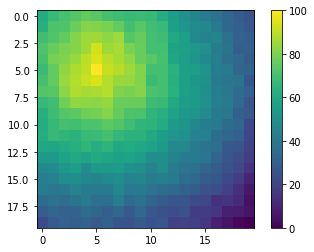



Rainfall, shape is  (20, 20)


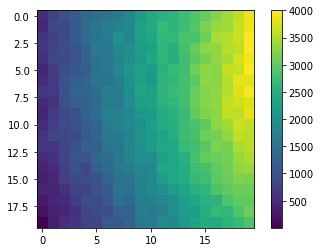

TypeError: ignored

In [49]:

import matplotlib.pyplot as plt


"""This is the driver - Livia Jakob S1790173"""



def plotstreams(flownode,colour):
    """Recursively plots upnodes in given colour
    
    Input Parameter:
        flownode – a FlowNode object
        colour – a colour, e.g. "red"
    """
    for node in flownode.getUpnodes():
        x1=flownode.get_x()
        y1=flownode.get_y()
        x2=node.get_x()
        y2=node.get_y()
        plt.plot([x1,x2],[y1,y2],color=colour)
        if (node.numUpnodes()>0):
            plotstreams(node,colour)

def plotFlowNetwork(originalRaster, flowRaster, title="", plotLakes=True):
    """Plots a flow network
    
    Input Parameter:
        originalRaster – a Raster object
        flowRaster – a FlowRaster object
        title – plot title, a string
        plotLake – binary variable stating if lakes should be plotted
                    True if lakes should be plotted
                    False if lakes should be ignored
    """
    print ("\n\n{}".format(title))
    plt.imshow(originalRaster.extractValues(Flow.ElevationExtractor()))
    plt.colorbar()
    colouri=-1
    colours=["black","red","magenta","yellow","green","cyan","white","orange","grey","brown"]

    for i in range(flowRaster.getRows()):
        for j in range(flowRaster.getCols()):
            node = flowRaster._data[i,j]
            
            if (node.getPitFlag()): # dealing with a pit
                plt.scatter(node.get_x(),node.get_y(), color="red")
                colouri+=1
                plotstreams(node, colours[colouri%len(colours)])
                
            if (plotLakes and node.getLakeDepth() > 0): #if lakedepth is zero, it is not a lake
                plt.scatter(node.get_x(),node.get_y(), color="blue")

    plt.show()

def plotExtractedData(flowRaster, extractor, title=""):
    """Plots extracted data
    
    Input Parameter:
        flowRaster – FlowRaster class object
        extractor – FlowExtractor class object, or LakedepthExtractor object
        title – String of chart title
    """
    print ("\n\n{}".format(title))
    plt.imshow(flowRaster.extractValues(extractor))
    plt.colorbar()
    plt.show()

def plotRaster(araster, title=""):
    """Plots a raster
    
    Input Parameter:
        araster – Raster class object
        title – plot title, a string
    """
    print ("\n\n{}, shape is  {}".format(title, araster.shape))
    plt.imshow(araster)
    plt.colorbar()
    plt.show()


def calculateFlowsAndPlot(elevation, rain, resampleF):
    """Calculates all the flows and plots them
    
    Input Parameter:
        elevation – a Raster class object containing elevation
        rain – a Raster class object containing rainfall
        resampleF – an Integer
    
    """
    
    # plot input rasters
    plotRaster(elevation.getData(), "Original elevation (m)") #plot elevation
    plotRaster(rain.getData(), "Rainfall") #plot rainfall

    resampledElevations = elevation.createWithIncreasedCellsize(resampleF)

    
    
    
    ################# step 1 find and plot the intial network #######
    fr=FlowRaster(resampledElevations) #create FlowRaster
    plotFlowNetwork(fr, fr, "Task 1: Network structure - before lakes", plotLakes=False) #plot flow raster
    

    ################Step 2 ######################################
    plotExtractedData(fr, Flow.FlowExtractor(1), "Task 2: River flow rates - constant rain")
    
    
    
    ################# step 3 #######################################
    #handle variable rainfall
    fr.addRainfall(rain.getData())
    plotExtractedData(fr, Flow.FlowExtractor(), "Task 3: River flow rates - variable rainfall")
    
    ############# step 4 and step 5 #######################################
    # handle lakes
    
    fr.calculateLakes()

    plotFlowNetwork(fr, fr, "Task 4: Network structure (i.e. watersheds) - with lakes")
    plotExtractedData(fr, Flow.LakeDepthExtractor(), "Task 4: Lake depth")
    plotExtractedData(fr, Flow.FlowExtractor(), "Parallel Flows")
    
    #TESTING
    #this line tests if total raster outflow is equal to total rainfall on the raster
    assert round(fr.getTotalFlow(), 2) == round(fr.getTotalRainfall(),2)
    
    
    ############# step 5 #######################################
    maxflow=fr.getMaximumFlow()
    print("Task 5: Maximum Flow: {} mm, at FlowNode object: {}".format(round(maxflow[0], 3), maxflow[1]))

    

############# step 1 to 4 #######################################
# Create Random Raster
rows=20
cols=20
xorg=0.
yorg=0.
xp=5
yp=5
nodata=-999.999
cellsize=1.
levels=2
datahi=100.
datalow=0
randpercent=0.1
    
resampleFactorA = 1
elevationRasterA = createRanRasterSlope( rows, cols, cellsize, xorg, yorg, nodata, levels, datahi, datalow, xp, yp, randpercent)   
rainrasterA=createRanRasterSlope(rows//resampleFactorA,cols//resampleFactorA,cellsize*resampleFactorA,xorg,yorg,nodata,levels,4000,1,36,4,.1)   

##random raster
calculateFlowsAndPlot(elevationRasterA, rainrasterA, resampleFactorA)

############# step 5 #######################################

#calculateFlowsAndPlot(readRaster('ascifiles/dem_hack.txt'), readRaster('ascifiles/rain_small_hack.txt'), 10)


# COURSEWORK Section

In [ ]:
from RasterHandler import createRanRasterSlope
import matplotlib.pyplot as plt 
import Flow as Flow
from RasterHandler import readRaster


"""This is the driver - Livia Jakob S1790173"""



def plotstreams(flownode,colour):
    """Recursively plots upnodes in given colour
    
    Input Parameter:
        flownode – a FlowNode object
        colour – a colour, e.g. "red"
    """
    for node in flownode.getUpnodes():
        x1=flownode.get_x()
        y1=flownode.get_y()
        x2=node.get_x()
        y2=node.get_y()
        plt.plot([x1,x2],[y1,y2],color=colour)
        if (node.numUpnodes()>0):
            plotstreams(node,colour)

def plotFlowNetwork(originalRaster, flowRaster, title="", plotLakes=True):
    """Plots a flow network
    
    Input Parameter:
        originalRaster – a Raster object
        flowRaster – a FlowRaster object
        title – plot title, a string
        plotLake – binary variable stating if lakes should be plotted
                    True if lakes should be plotted
                    False if lakes should be ignored
    """
    print ("\n\n{}".format(title))
    plt.imshow(originalRaster.extractValues(Flow.ElevationExtractor()))
    plt.colorbar()
    colouri=-1
    colours=["black","red","magenta","yellow","green","cyan","white","orange","grey","brown"]

    for i in range(flowRaster.getRows()):
        for j in range(flowRaster.getCols()):
            node = flowRaster._data[i,j]
            
            if (node.getPitFlag()): # dealing with a pit
                plt.scatter(node.get_x(),node.get_y(), color="red")
                colouri+=1
                plotstreams(node, colours[colouri%len(colours)])
                
            if (plotLakes and node.getLakeDepth() > 0): #if lakedepth is zero, it is not a lake
                plt.scatter(node.get_x(),node.get_y(), color="blue")

    plt.show()

def plotExtractedData(flowRaster, extractor, title=""):
    """Plots extracted data
    
    Input Parameter:
        flowRaster – FlowRaster class object
        extractor – FlowExtractor class object, or LakedepthExtractor object
        title – String of chart title
    """
    print ("\n\n{}".format(title))
    plt.imshow(flowRaster.extractValues(extractor))
    plt.colorbar()
    plt.show()

def plotRaster(araster, title=""):
    """Plots a raster
    
    Input Parameter:
        araster – Raster class object
        title – plot title, a string
    """
    print ("\n\n{}, shape is  {}".format(title, araster.shape))
    plt.imshow(araster)
    plt.colorbar()
    plt.show()


def calculateFlowsAndPlot(elevation, rain, resampleF):
    """Calculates all the flows and plots them
    
    Input Parameter:
        elevation – a Raster class object containing elevation
        rain – a Raster class object containing rainfall
        resampleF – an Integer
    
    """
    
    # plot input rasters
    plotRaster(elevation.getData(), "Original elevation (m)") #plot elevation
    plotRaster(rain.getData(), "Rainfall") #plot rainfall

    resampledElevations = elevation.createWithIncreasedCellsize(resampleF)

    
    
    
    ################# step 1 find and plot the intial network #######
    fr=Flow.FlowRaster(resampledElevations) #create FlowRaster
    plotFlowNetwork(fr, fr, "Task 1: Network structure - before lakes", plotLakes=False) #plot flow raster
    
    ################Step 2 ######################################
    plotExtractedData(fr, Flow.FlowExtractor(1), "Task 2: River flow rates - constant rain")
    
    ################# step 3 #######################################
    #handle variable rainfall
    fr.addRainfall(rain.getData())
    plotExtractedData(fr, Flow.FlowExtractor(), "Task 3: River flow rates - variable rainfall")
    
    ############# step 4 and step 5 #######################################
    # handle lakes
    
    fr.calculateLakes()

    plotFlowNetwork(fr, fr, "Task 4: Network structure (i.e. watersheds) - with lakes")
    plotExtractedData(fr, Flow.LakeDepthExtractor(), "Task 4: Lake depth")
    plotExtractedData(fr, Flow.FlowExtractor(), "Task 4: River flow rates - variable rainfall")
    
    #TESTING
    #this line tests if total raster outflow is equal to total rainfall on the raster
    assert round(fr.getTotalFlow(), 2) == round(fr.getTotalRainfall(),2)
    
    ############# step 5 #######################################
    maxflow=fr.getMaximumFlow()
    print("Task 5: Maximum Flow: {} mm, at FlowNode object: {}".format(round(maxflow[0], 3), maxflow[1]))

    

############# step 1 to 4 #######################################
# Create Random Raster
rows=20
cols=20
xorg=0.
yorg=0.
xp=5
yp=5
nodata=-999.999
cellsize=1.
levels=4
datahi=100.
datalow=0
randpercent=0.3
    
resampleFactorA = 1
elevationRasterA=createRanRasterSlope(rows,cols,cellsize,xorg,yorg,nodata,levels,datahi,datalow,xp,yp,randpercent)   
rainrasterA=createRanRasterSlope(rows//resampleFactorA,cols//resampleFactorA,cellsize*resampleFactorA,xorg,yorg,nodata,levels,4000,1,36,4,.1)   

##random raster
calculateFlowsAndPlot(elevationRasterA, rainrasterA, resampleFactorA)

############# step 5 #######################################

#calculateFlowsAndPlot(readRaster('ascifiles/dem_hack.txt'), readRaster('ascifiles/rain_small_hack.txt'), 10)


# test Section

In [43]:
levels=2
rows=5
cols=4
levels=min(levels,rows)
levels=min(levels,cols)
import jax.numpy as jnp
data=jnp.zeros([levels,rows,cols])  
import jax.random as random
key = random.PRNGKey(0)
key, subkey = random.split(key)
print(data,":",key)
#data=random.uniform(key,minval=0, maxval=100) 
print(type(data))
#import numpy as np
#xx=data.at[:,:,:].set(random.uniform(subkey,minval=0, maxval=100))
#print(xx.size)
#print(xx)
#import jax.random as random
#xx=random.uniform(subkey,shape=xx.shape,minval=0, maxval=100)
#print(xx.size)
#print("xx values ::: \n\n\n",xx)
data=data.at[:,:,:].set(random.uniform(key,shape=data.shape,minval=0, maxval=100))
#print("data values ::: \n\n\n",data)

for i in range(levels):
       lin=((i)*2)+1
       lin2=lin*lin
       iterator=jnp.zeros([lin2,2], dtype=int)
       for itx in range(lin):
           for ity in range(lin):
               #iterator[itx*lin+ity,0]=(itx-i)
               iterator=iterator.at[itx*lin+ity,0].set(itx-i)
       #print("iterator ::\n\n\n",iterator)
       part=data[i]
       new=jnp.zeros([rows,cols])
       for j in range(rows):
         for k in range(cols):
           for it in range(lin2):
             r=(j+iterator[it,0])%rows
             c=(k+iterator[it,1])%cols
             new=new.at[j,k].set(new[j,k]+part[r,c])
             #new[j,k]=new[j,k]+part[r,c]
           #print("new +++ values :: \n\n\n",new)
       #print("new values :: \n\n\n",new)

       minval=jnp.min(new)
       maxval=jnp.max(new)
       ran=maxval-minval
       #data[i]=((new-minval)/ran)*(2**i)
       data=data.at[i].set(((new-minval)/ran)*(2**i))
       print("data values :: \n\n\n",data)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]] : [4146024105  967050713]
<class 'jaxlib.xla_extension.DeviceArray'>
data values :: 


 [[[5.9417129e-01 4.2608312e-01 5.8493966e-01 1.6759988e-02]
  [9.9745065e-01 6.5833151e-02 3.0837506e-01 9.6585339e-01]
  [2.8891176e-01 7.2421759e-01 2.0459422e-01 0.0000000e+00]
  [5.4319292e-01 5.8920777e-01 6.1877561e-01 7.9086244e-01]
  [3.0451652e-01 6.6416883e-01 1.0000000e+00 1.4756081e-01]]

 [[8.7501503e+01 3.2613373e+01 7.0772079e+01 3.9069702e+01]
  [7.6112953e+01 4.4295502e+01 5.8675430e+01 3.3353626e+01]
  [3.0685211e+01 8.7731934e+01 5.5142639e+01 4.1180790e+01]
  [9.3375687e+01 8.3575203e+01 4.3084167e+01 7.5464233e+01]
  [8.8820610e+01 9.4580986e+01 5.5699707e+01 3.3785175e+01]]]
data values :: 


 [[[0.5941713  0.42608312 0.58493966 0.01675999]
  [0.99745065 0.06583315 0.30837506 0.9658534 ]
  [0.28891176 0.7242176  0.20

In [41]:
import numpy as np

rows=5
cols=4
levels=2
levels=min(levels,rows)
levels=min(levels,cols)
data=np.zeros([levels,rows,cols])  
#print(data)
import random
for xx in np.nditer(data,op_flags=['readwrite']):
    xx[...]=random.uniform(0,100) 
    #print(xx)
#print(xx.size)
#print(xx)
print(data)


for i in range(levels):
       lin=((i)*2)+1
       lin2=lin*lin
       iterator=np.zeros([lin2,2], dtype=int)
       for itx in range(lin):
           for ity in range(lin):
               iterator[itx*lin+ity,0]=(itx-i)
               #iterator=iterator.at[itx*lin+ity,0].set(itx-i)
       #print("iterator ::\n\n\n",iterator)
       part=data[i]
       new=np.zeros([rows,cols])
       for j in range(rows):
         for k in range(cols):
           for it in range(lin2):
             r=(j+iterator[it,0])%rows
             c=(k+iterator[it,1])%cols
             #new=new.at[j,k].set()
             new[j,k]=new[j,k]+part[r,c]
           #print("new +++ values :: \n\n\n",new)
       #print("new values :: \n\n\n",new)

       minval=jnp.min(new)
       maxval=jnp.max(new)
       ran=maxval-minval
       data[i]=((new-minval)/ran)*(2**i)
       print("data values :: \n\n\n",data)

[[[83.41379847 76.68662519 87.76934521 21.28387383]
  [ 5.2704397  48.9776619  48.99710452 25.0378576 ]
  [ 3.90758952 53.58692646 50.00152405 46.88697332]
  [93.67332948  6.3993739  31.27285071 92.35896736]
  [50.79728506 40.95431927 61.00661311 27.0686759 ]]

 [[47.43023188 81.17348796 84.42312102 48.10999382]
  [56.01409063 69.629526   25.369965   44.97357524]
  [71.9768664  60.40579445 84.77893358 85.40543276]
  [55.40103242  3.84968422 56.07411847  0.56001809]
  [61.55220276 86.75152144 88.65027899 98.5719231 ]]]
data values :: 


 [[[8.85707676e-01 8.10766220e-01 9.34228957e-01 1.93573698e-01]
  [1.51822977e-02 5.02085447e-01 5.02302051e-01 2.35393465e-01]
  [0.00000000e+00 5.53433180e-01 5.13491392e-01 4.78794992e-01]
  [1.00000000e+00 2.77587492e-02 3.04851949e-01 9.85357881e-01]
  [5.22356212e-01 4.12704557e-01 6.36089265e-01 2.58017004e-01]]

 [[4.74302319e+01 8.11734880e+01 8.44231210e+01 4.81099938e+01]
  [5.60140906e+01 6.96295260e+01 2.53699650e+01 4.49735752e+01]
  [7.19